In [1]:
import torch
from torch import nn
from d2l import torch as d2l


In [2]:
class Reshape(nn.Module):
    def forward(self, X):
        return X.reshape(-1,1,28,28)

In [3]:
class Input(nn.Module):
    def forward(self, X):
        return X

## LeNet-5 由两个部分组成：卷积编码器和全连接层密集块

In [5]:
net = nn.Sequential(
    Reshape(),
    # Input(),
    
    nn.Conv2d(1, 6, kernel_size=5, padding=2), nn.Sigmoid(),
    nn.AvgPool2d(kernel_size=2, stride=2),
    nn.Conv2d(6, 16, kernel_size=5), nn.Sigmoid(),
    nn.AvgPool2d(kernel_size=2, stride=2),
    nn.Flatten(),
    nn.Linear(16 * 5 * 5, 120), nn.Sigmoid(), # keras和maxnet 框架是不用算的，  pytorch要算一下shape
    nn.Linear(120, 84), nn.Sigmoid(),
    nn.Linear(84, 10)
)

## 检查模型

In [6]:
X = torch.rand(size=(1,1,28,28), dtype=torch.float32)

In [7]:
for layer in net:
    X = layer(X)
    print(layer.__class__.__name__, '输出形状：\t', X.shape)

Reshape 输出形状：	 torch.Size([1, 1, 28, 28])
Conv2d 输出形状：	 torch.Size([1, 6, 28, 28])
Sigmoid 输出形状：	 torch.Size([1, 6, 28, 28])
AvgPool2d 输出形状：	 torch.Size([1, 6, 14, 14])
Conv2d 输出形状：	 torch.Size([1, 16, 10, 10])
Sigmoid 输出形状：	 torch.Size([1, 16, 10, 10])
AvgPool2d 输出形状：	 torch.Size([1, 16, 5, 5])
Flatten 输出形状：	 torch.Size([1, 400])
Linear 输出形状：	 torch.Size([1, 120])
Sigmoid 输出形状：	 torch.Size([1, 120])
Linear 输出形状：	 torch.Size([1, 84])
Sigmoid 输出形状：	 torch.Size([1, 84])
Linear 输出形状：	 torch.Size([1, 10])


# LeNet在Fashion-MNIST数据集上的表现

In [31]:
batch_size = 256
train_iter, test_iter = d2l.load_data_fashion_mnist(batch_size=batch_size)

In [32]:
train_iter

In [33]:
dataiter = iter(train_iter)

In [35]:
images, labels = next(dataiter)

In [37]:
import torchvision
img_grid = torchvision.utils.make_grid(images)

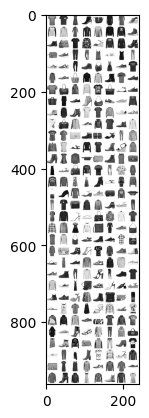

In [42]:
import matplotlib.pyplot as plt
def matplotlib_imshow(img, one_channel=False):
    if one_channel:
        img = img.mean(dim=0)
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    if one_channel:
        plt.imshow(npimg, cmap="Greys")
    else:
        plt.imshow(np.transpose(npimg, (1, 2, 0)))
matplotlib_imshow(img_grid, one_channel=True)
from torch.utils.tensorboard import SummaryWriter

# default `log_dir` is "runs" - we'll be more specific here
writer = SummaryWriter('runs/fashion_mnist_experiment_1')
writer.add_image('four_fashion_mnist_images', img_grid)

In [43]:
writer.add_graph(net, images)
writer.close()

In [48]:
def evaluate_acc_gpu(net, data_iter, device=None):
    if isinstance(net, nn.Module):
        net.eval()
        if not device:
            device = next(iter(

SyntaxError: unexpected EOF while parsing (1569282076.py, line 5)

In [11]:
from torch.utils.tensorboard import SummaryWriter

In [19]:
def train_ch6(net, train_iter, test_iter, num_epochs, lr, device):
    def init_weights(m):
        if type(m) == nn.Linear or type(m) == nn.Conv2d:
            #在 PyTorch 中，尾随下划线 _ 是一种惯例，用于表示该方法会直接修改变量本身（即操作是in-place的）。
            nn.init.xavier_normal_(m.weight)
    net.apply(init_weights)
    print('training on', device)
    net.to(device)
    optimizer = torch.optim.SGD(net.parameters(), lr=lr)
    loss = nn.CrossEntropyLoss()
    num_epochs = len(train_iter)
    print(f'num_epochs {num_epochs}')
    writer = SummaryWriter("LeNet_FasionMNIST_Logs") 
    for epoch in range(10):
        net.train()
        for i, (X, y) in enumerate(train_iter):
            optimizer.zero_grad()
            X, y = X.to(device), y.to(device)
            y_hat = net(X)
            l = loss(y_hat, y)
            
            
            l.backward()
            optimizer.step()
        writer.add_scalar("Loss/train", l, epoch)
        print(l)
    writer.flush()
    writer.close()
    

In [20]:
lr, num_epochs = 0.9, 10
train_ch6(net, train_iter, test_iter, num_epochs, lr, d2l.try_gpu())

training on cpu
num_epochs 235
tensor(2.3173, grad_fn=<NllLossBackward0>)
tensor(1.2583, grad_fn=<NllLossBackward0>)
tensor(0.8449, grad_fn=<NllLossBackward0>)
tensor(0.9458, grad_fn=<NllLossBackward0>)
tensor(0.4812, grad_fn=<NllLossBackward0>)
tensor(0.6408, grad_fn=<NllLossBackward0>)
tensor(0.6817, grad_fn=<NllLossBackward0>)
tensor(0.5117, grad_fn=<NllLossBackward0>)
tensor(0.5477, grad_fn=<NllLossBackward0>)
tensor(0.3608, grad_fn=<NllLossBackward0>)


In [21]:
%load_ext tensorboard
%tensorboard --logdir LeNet_FasionMNIST_Logs

Reusing TensorBoard on port 6006 (pid 35792), started 1:40:20 ago. (Use '!kill 35792' to kill it.)

In [2]:
import torch
from torch import nn
from d2l import torch as d2l
batch_size = 4
train_iter, test_iter = d2l.load_data_fashion_mnist(batch_size=batch_size)

import matplotlib.pyplot as plt
def matplotlib_imshow(img, one_channel=False):
    if one_channel:
        img = img.mean(dim=0)
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    if one_channel:
        plt.imshow(npimg, cmap="Greys")
    else:
        plt.imshow(np.transpose(npimg, (1, 2, 0)))

from torch.utils.tensorboard import SummaryWriter

# default `log_dir` is "runs" - we'll be more specific here
writer = SummaryWriter('runs/fashion_mnist_experiment_1')


net = nn.Sequential(
    nn.Conv2d(1, 6, kernel_size=5, padding=2), nn.Sigmoid(),
    nn.AvgPool2d(kernel_size=2, stride=2),
    nn.Conv2d(6, 16, kernel_size=5), nn.Sigmoid(),
    nn.AvgPool2d(kernel_size=2, stride=2),
    nn.Flatten(),
    nn.Linear(16 * 5 * 5, 120), nn.Sigmoid(), # keras和maxnet 框架是不用算的，  pytorch要算一下shape
    nn.Linear(120, 84), nn.Sigmoid(),
    nn.Linear(84, 10)
)

In [4]:
classes = ('T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
        'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle Boot')
# helper function
def select_n_random(data, labels, n=100):
    '''
    Selects n random datapoints and their corresponding labels from a dataset
    '''
    assert len(data) == len(labels)

    perm = torch.randperm(len(data))
    return data[perm][:n], labels[perm][:n]

# select random images and their target indices
images, labels = select_n_random(train_iter.dataset.data, train_iter.dataset.targets)

# get the class labels for each image
class_labels = [classes[lab] for lab in labels]

# log embeddings
features = images.view(-1, 28 * 28)
writer.add_embedding(features,
                    metadata=class_labels,
                    label_img=images.unsqueeze(1))
writer.close()

In [5]:
# helper functions

def images_to_probs(net, images):
    '''
    Generates predictions and corresponding probabilities from a trained
    network and a list of images
    '''
    output = net(images)
    # convert output probabilities to predicted class
    _, preds_tensor = torch.max(output, 1)
    preds = np.squeeze(preds_tensor.numpy())
    return preds, [F.softmax(el, dim=0)[i].item() for i, el in zip(preds, output)]


def plot_classes_preds(net, images, labels):
    '''
    Generates matplotlib Figure using a trained network, along with images
    and labels from a batch, that shows the network's top prediction along
    with its probability, alongside the actual label, coloring this
    information based on whether the prediction was correct or not.
    Uses the "images_to_probs" function.
    '''
    preds, probs = images_to_probs(net, images)
    # plot the images in the batch, along with predicted and true labels
    fig = plt.figure(figsize=(12, 48))
    for idx in np.arange(4):
        ax = fig.add_subplot(1, 4, idx+1, xticks=[], yticks=[])
        matplotlib_imshow(images[idx], one_channel=True)
        ax.set_title("{0}, {1:.1f}%\n(label: {2})".format(
            classes[preds[idx]],
            probs[idx] * 100.0,
            classes[labels[idx]]),
                    color=("green" if preds[idx]==labels[idx].item() else "red"))
    return fig

In [12]:
import torch.optim as optim

import torch
import torchvision
import torchvision.transforms as transforms

import torch.nn as nn
import torch.nn.functional as F
running_loss = 0.0
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)
import numpy as np
for epoch in range(1):  # loop over the dataset multiple times

    for i, data in enumerate(train_iter, 0):

        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        if i % 1000 == 999:    # every 1000 mini-batches...

            # ...log the running loss
            writer.add_scalar('training loss',
                            running_loss / 1000,
                            epoch * len(train_iter) + i)

            # ...log a Matplotlib Figure showing the model's predictions on a
            # random mini-batch
            writer.add_figure('predictions vs. actuals',
                            plot_classes_preds(net, inputs, labels),
                            global_step=epoch * len(train_iter) + i)
            running_loss = 0.0
print('Finished Training')

Finished Training
